<a href="https://colab.research.google.com/github/Thrisha-19/Deep-Learning/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
Ravdess = "./archive9/audio_speech_actors_01-24/"
Crema = "./archive10/AudioWAV/"
Tess = "./archive12/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
Savee = "./archive11/ALL/"

In [ ]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,neutral,./archive9/audio_speech_actors_01-24/Actor_01/...
1,neutral,./archive9/audio_speech_actors_01-24/Actor_01/...
2,neutral,./archive9/audio_speech_actors_01-24/Actor_01/...
3,neutral,./archive9/audio_speech_actors_01-24/Actor_01/...
4,calm,./archive9/audio_speech_actors_01-24/Actor_01/...


In [ ]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    file_path.append(Crema + file)
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,angry,./archive10/AudioWAV/1001_DFA_ANG_XX.wav
1,disgust,./archive10/AudioWAV/1001_DFA_DIS_XX.wav
2,fear,./archive10/AudioWAV/1001_DFA_FEA_XX.wav
3,happy,./archive10/AudioWAV/1001_DFA_HAP_XX.wav
4,neutral,./archive10/AudioWAV/1001_DFA_NEU_XX.wav


In [ ]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,angry,./archive12/tess toronto emotional speech set ...
1,angry,./archive12/tess toronto emotional speech set ...
2,angry,./archive12/tess toronto emotional speech set ...
3,angry,./archive12/tess toronto emotional speech set ...
4,angry,./archive12/tess toronto emotional speech set ...


In [ ]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,angry,./archive11/ALL/DC_a01.wav
1,angry,./archive11/ALL/DC_a02.wav
2,angry,./archive11/ALL/DC_a03.wav
3,angry,./archive11/ALL/DC_a04.wav
4,angry,./archive11/ALL/DC_a05.wav


In [ ]:
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,./archive9/audio_speech_actors_01-24/Actor_01/...
1,neutral,./archive9/audio_speech_actors_01-24/Actor_01/...
2,neutral,./archive9/audio_speech_actors_01-24/Actor_01/...
3,neutral,./archive9/audio_speech_actors_01-24/Actor_01/...
4,calm,./archive9/audio_speech_actors_01-24/Actor_01/...


In [ ]:
data_path = pd.read_csv("/content/data_path.csv")

In [ ]:
unique_emotions = data_path['Emotions'].unique()
print(unique_emotions)

['neutral' 'calm' 'happy' 'sad' 'angry' 'fear' 'disgust' 'surprise']


In [ ]:
emotion_counts = data_path['Emotions'].value_counts()
print(emotion_counts)

happy       1923
sad         1923
angry       1923
fear        1923
disgust     1923
neutral     1703
surprise     652
calm         192
Name: Emotions, dtype: int64


In [ ]:
data_path['Emotions'] = data_path['Emotions'].astype('category')

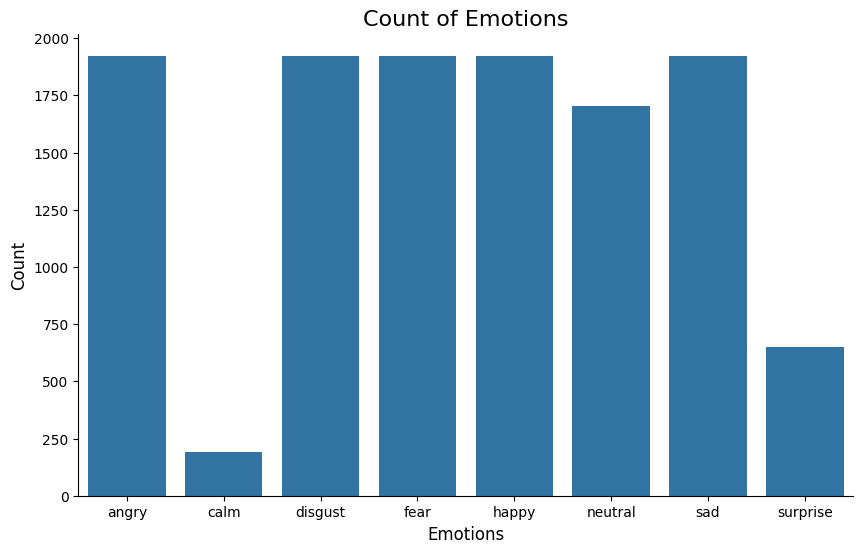

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Count of Emotions', size=16)
sns.countplot(data=data_path, x='Emotions')
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

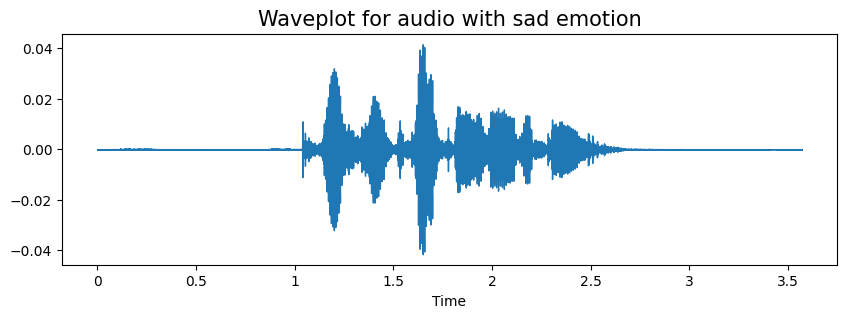

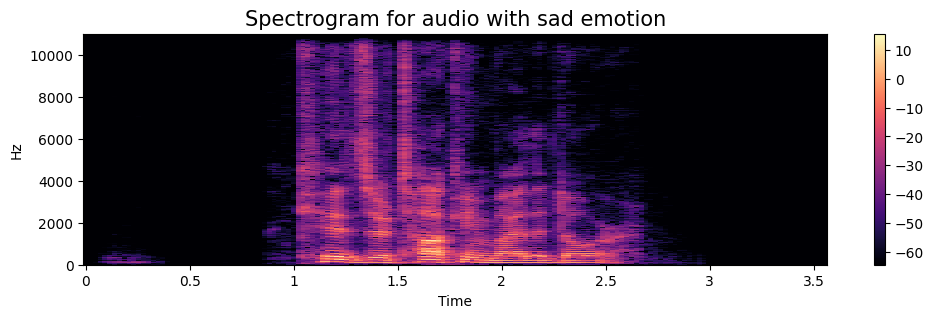

In [ ]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

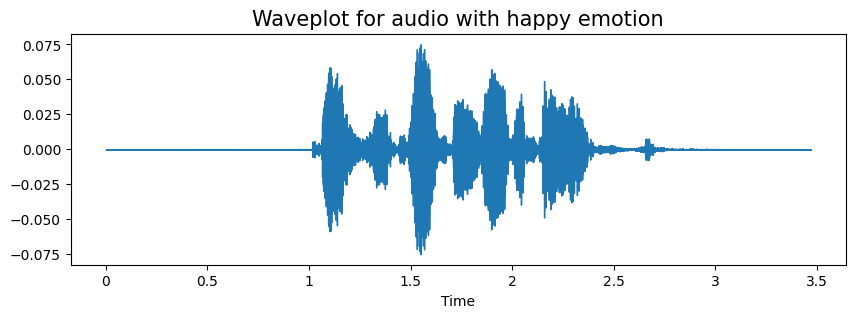

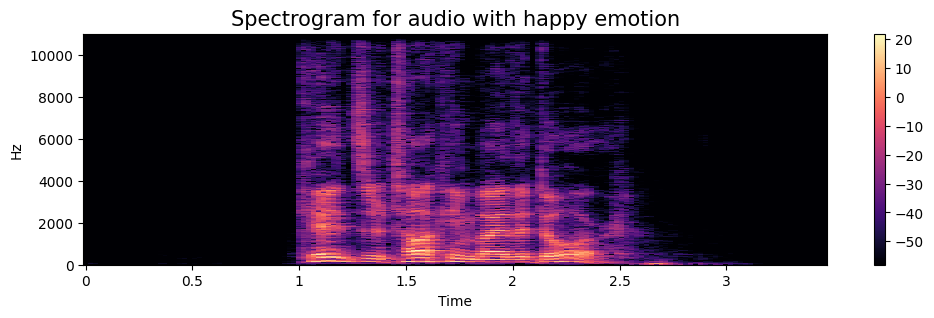

In [ ]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate = rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    n_steps = int(pitch_factor * len(data) / sampling_rate)
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=n_steps)

path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

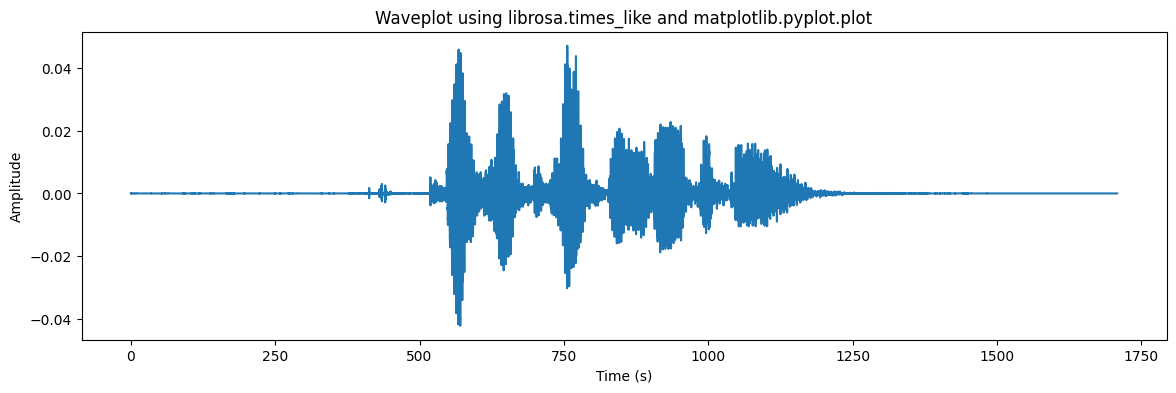

In [ ]:
time = librosa.times_like(data, sr=sample_rate)

plt.figure(figsize=(14, 4))
plt.plot(time, data)
plt.title('Waveplot using librosa.times_like and matplotlib.pyplot.plot')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


In [ ]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr))

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))

    return result

def get_features(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2))

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3))

    return result

In [ ]:
Features=pd.read_csv("/content/features.csv")
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.321275,0.729664,0.750033,0.730624,0.735275,0.713529,0.660531,0.684966,0.733049,0.753972,...,4.310903e-06,3.291511e-06,2.148075e-06,2.279739e-06,0.000005,8.190282e-06,7.024454e-06,5.051209e-06,4.245834e-07,neutral
1,0.288954,0.771780,0.798971,0.779141,0.775237,0.780162,0.676582,0.665597,0.710856,0.749200,...,9.092433e-06,8.181747e-06,7.213999e-06,7.094953e-06,0.000010,1.319527e-05,1.164331e-05,1.010528e-05,5.613684e-06,neutral
2,0.175326,0.697448,0.648264,0.700973,0.754420,0.685841,0.654024,0.673897,0.660135,0.670811,...,9.860186e-07,5.285366e-07,8.273390e-07,6.289396e-07,0.000001,5.300839e-07,4.321551e-07,1.911252e-07,2.231159e-08,neutral
3,0.293566,0.673896,0.722096,0.723508,0.682302,0.680533,0.675352,0.628977,0.679179,0.707283,...,6.984504e-06,7.034951e-06,6.654923e-06,6.979548e-06,0.000012,9.640183e-06,1.096403e-05,5.543237e-06,4.254087e-07,neutral
4,0.331855,0.779217,0.832673,0.836867,0.796727,0.803142,0.765247,0.651021,0.691771,0.753647,...,1.509587e-04,1.519317e-04,1.504462e-04,1.444530e-04,0.000159,1.494923e-04,1.547625e-04,1.486433e-04,1.430787e-04,neutral


In [ ]:
Y = Features['labels']

In [ ]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [ ]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
len(Y)

36486

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [ ]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162, 1), (27364, 8), (9122, 162, 1), (9122, 8))

In [ ]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          1536      
                                                                 
 max_pooling1d (MaxPooling1  (None, 81, 256)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 256)           327936    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 41, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 41, 128)           163968    
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 21, 128)         

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50


428/428 [==============================] - 32s 70ms/step - loss: 1.6886 - accuracy: 0.3164 - val_loss: 1.4731 - val_accuracy: 0.4183 - lr: 0.0010
Epoch 2/50
428/428 [==============================] - 29s 68ms/step - loss: 1.4514 - accuracy: 0.4198 - val_loss: 1.3051 - val_accuracy: 0.4815 - lr: 0.0010
Epoch 3/50
428/428 [==============================] - 29s 68ms/step - loss: 1.3503 - accuracy: 0.4596 - val_loss: 1.2721 - val_accuracy: 0.4990 - lr: 0.0010
Epoch 4/50
428/428 [==============================] - 29s 68ms/step - loss: 1.2915 - accuracy: 0.4887 - val_loss: 1.2022 - val_accuracy: 0.5264 - lr: 0.0010
Epoch 5/50
428/428 [==============================] - 29s 69ms/step - loss: 1.2587 - accuracy: 0.4994 - val_loss: 1.1979 - val_accuracy: 0.5205 - lr: 0.0010
Epoch 6/50
428/428 [==============================] - 29s 69ms/step - loss: 1.2268 - accuracy: 0.5117 - val_loss: 1.1711 - val_accuracy: 0.5383 - lr: 0.0010
Epoch 7/50
428/428 [==============================] - 30

In [ ]:
model.save('model.h5')

Accuracy of our model on test data :  70.28999999999999 %


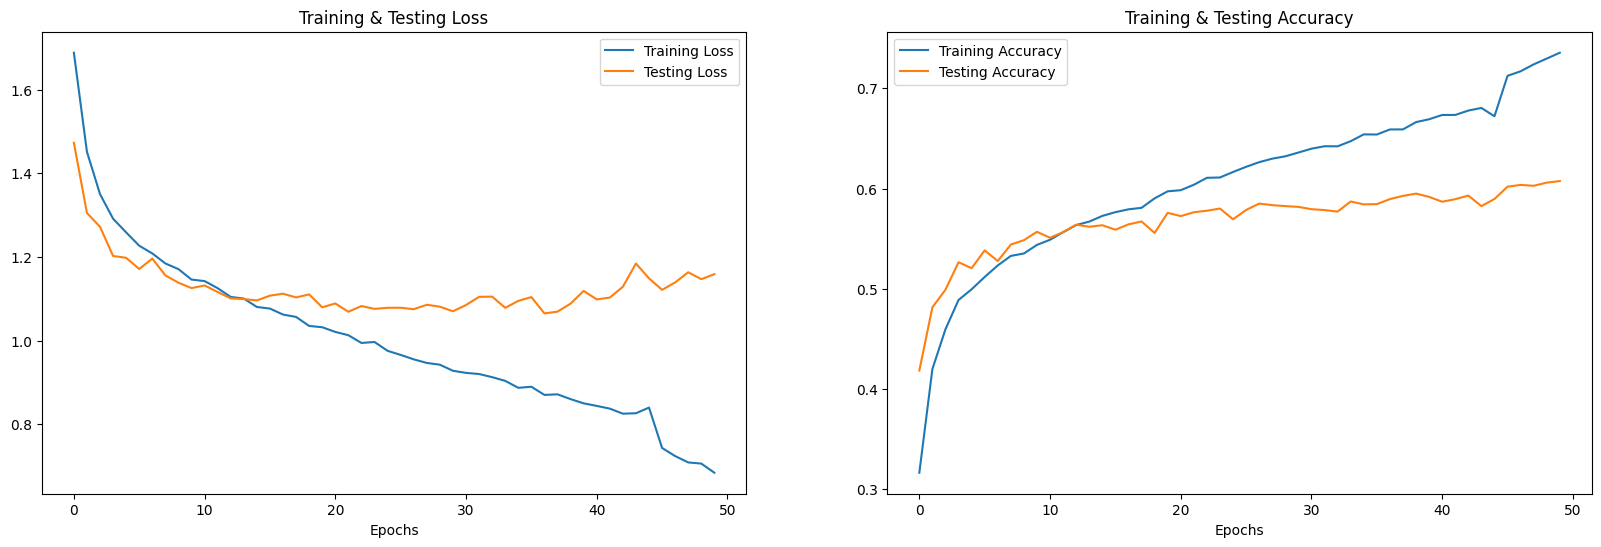

In [ ]:
print("Accuracy of our model on test data : " , 0.7029*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

286/286 [==============================] - 3s 11ms/step


In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df[170:180]

,Predicted Labels,Actual Labels
170,neutral,neutral
171,sad,sad
172,sad,neutral
173,sad,sad
174,neutral,sad
175,surprise,surprise
176,disgust,sad
177,sad,sad
178,sad,disgust
179,happy,happy


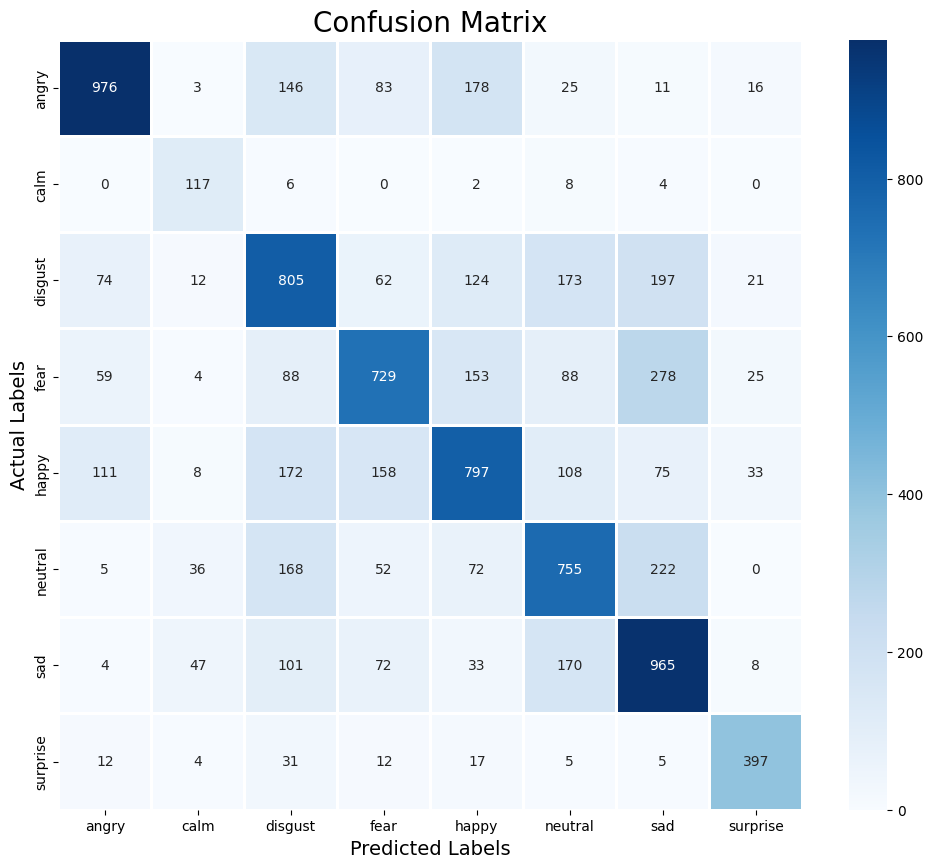

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.79      0.68      0.73      1438
        calm       0.51      0.85      0.64       137
     disgust       0.53      0.55      0.54      1468
        fear       0.62      0.51      0.56      1424
       happy       0.58      0.55      0.56      1462
     neutral       0.57      0.58      0.57      1310
         sad       0.55      0.69      0.61      1400
    surprise       0.79      0.82      0.81       483

    accuracy                           0.61      9122
   macro avg       0.62      0.65      0.63      9122
weighted avg       0.61      0.61      0.61      9122



In [ ]:
pip install sounddevice

In [ ]:
!sudo apt-get install libportaudio2

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 65.3 kB of archives.
After this operation, 223 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Fetched 65.3 kB in 1s (60.4 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 121752 fi

In [ ]:
import numpy as np
import librosa
from keras.models import load_model
from sklearn.preprocessing import StandardScaler
import sounddevice as sd

In [ ]:
model = load_model('model.h5')

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [ ]:
def extract_features(audio_data):
    # ZCR
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=audio_data).T, axis=0)

    # Chroma_stft
    stft = np.abs(librosa.stft(audio_data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft).T, axis=0)

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=audio_data).T, axis=0)

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=audio_data).T, axis=0)

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=audio_data).T, axis=0)

    # Concatenate features
    features = np.hstack((zcr, chroma_stft, mfcc, rms, mel))

    # Scale features
    scaled_features = scaler.transform(features.reshape(1, -1))

    return scaled_features

In [ ]:
def predict_emotion(features):
    # Use your trained model to predict emotion
    raw_predictions = model.predict(features)

    # Find the index of the maximum value in the predictions
    predicted_emotion_index = np.argmax(raw_predictions)

    # Convert the index to the corresponding emotion label
    emotion_mapping = {0: 'happy', 1: 'sad', 2: 'angry', 3: 'fear', 4: 'disgust',
                       5: 'neutral', 6: 'surprise', 7: 'calm'}  # Update with your actual emotion labels
    predicted_label = emotion_mapping[predicted_emotion_index]

    return predicted_label

In [ ]:
def callback(indata, frames, time, status):
    if status:
        print(status)
    audio_data = np.squeeze(indata)

    if np.isnan(audio_data).any() or np.isinf(audio_data).any():
        print("Audio data contains NaNs or infinite values. Skipping.")
        return

    # Extract features from the captured audio
    features = extract_features(audio_data)

    # Predict emotion
    predicted_emotion = predict_emotion(features)

    # Print the predicted emotion
    print("Predicted Emotion:", predicted_emotion)

In [ ]:
duration = 2
sample_rate = 22050

In [ ]:
print("Current working directory:", os.getcwd())

audio_file_path = input("Enter the path to the audio file: ")
print("File path:", audio_file_path)
if os.path.exists(audio_file_path):
    # Load the audio file
    audio_data, sample_rate = librosa.load(audio_file_path, sr=None)
    features = extract_features(audio_data)

    predicted_emotion = predict_emotion(features)

    print("Predicted Emotion:", predicted_emotion)
else:
    print("Error: File not found.")

Current working directory: /content
Enter the path to the audio file: /content/OAF_bath_fear.wav
File path: /content/OAF_bath_fear.wav
1/1 [==============================] - 0s 283ms/step
Predicted Emotion: fear


In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.3 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import numpy as np
from keras.models import load_model
import joblib

In [ ]:
%%writefile app.py
import streamlit as st
import librosa
import numpy as np
from keras.models import load_model
from sklearn.preprocessing import StandardScaler
import sounddevice as sd
st.set_option(‘server.port’, 8502)
model = load_model(/content/model.h5')
scaler = StandardScaler()

def extract_features(audio_data):
    # ZCR
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=audio_data).T, axis=0)

    # Chroma_stft
    stft = np.abs(librosa.stft(audio_data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft).T, axis=0)

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=audio_data).T, axis=0)

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=audio_data).T, axis=0)

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=audio_data).T, axis=0)

    # Concatenate features
    features = np.hstack((zcr, chroma_stft, mfcc, rms, mel))

    # Scale features
    scaled_features = scaler.transform(features.reshape(1, -1))

    return scaled_features

def predict_emotion(features):
    raw_predictions = model.predict(features)
    predicted_emotion_index = np.argmax(raw_predictions)
    emotion_mapping = {0: 'happy', 1: 'sad', 2: 'angry', 3: 'fear', 4: 'disgust',
                       5: 'neutral', 6: 'surprise', 7: 'calm'}
    predicted_label = emotion_mapping[predicted_emotion_index]
    return predicted_label

def main():
    st.title("Speech Emotion Recognition App")

    uploaded_file = st.file_uploader("Upload an audio file", type=["wav"])

    if uploaded_file is not None:
        st.audio(uploaded_file, format="audio/wav", start_time=0)
        audio_data, sample_rate = librosa.load(uploaded_file, sr=None)
        features = extract_features(audio_data)

        predicted_emotion = predict_emotion(features)

        st.write("Predicted Emotion:", predicted_emotion)

if __name__ == "__main__":
    main()

Overwriting app.py


In [ ]:
!pip install pyngrok

In [ ]:
from pyngrok import ngrok

# Set the authtoken (replace 'your_authtoken' with your actual authtoken)
ngrok.set_auth_token("2ddi2XHiTZ738wctgdIjtdJ02yP_7QsqQ6UbPBszzNWBrH1EG")

In [ ]:
ngrok_tunnel = ngrok.connect(addr='8501', proto='http', bind_tls=True)

# Print the public URL
print("Public URL:", ngrok_tunnel.public_url)

Public URL: https://0e0c-35-221-241-24.ngrok-free.app


In [ ]:
!streamlit run --server.port 8502 app.py &




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8502
  External URL: http://35.221.241.24:8502

  Stopping...


In [ ]:
!streamlit run app.py &




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.221.241.24:8501

  Stopping...


In [ ]:
st.title("Speech Emotion Recognition App")
uploaded_file = st.file_uploader("Choose an audio file (in WAV format)", type="wav")

def predict_emotion(audio_data):
    prediction = model.predict(np.random.randn(features))
    predicted_emotion = np.argmax(prediction)

    return predicted_emotion
if uploaded_file:
    audio_data = process_audio_file(uploaded_file)
    predicted_emotion = predict_emotion(audio_data)

    st.write(f"Predicted Emotion: {predicted_emotion}")

2024-03-10 22:43:58.980 
  command:

    streamlit run C:\Users\THRISHA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel_launcher.py [ARGUMENTS]
